In [1]:
# pip install selenium
# pip install beautifulsoup4
# pip install webdriver-manager
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
import json

In [2]:
server = Service('chromedriver.exe')

In [3]:
options = webdriver.ChromeOptions()

In [4]:
options.add_argument('--headless')

In [5]:
# 規避 bug
options.add_argument('--disable-gpu')

In [6]:

options.add_argument('--disable-javascript')

In [7]:
# 最高權限
options.add_argument('--no-sandbox')

In [8]:
options.add_argument('--disable-dev-shm-usage')

In [9]:
url = 'https://www.google.com.tw'

In [10]:
# DeprecationWarning: use options instead of chrome_options 參數棄用
# dirver = webdriver.Chrome('chromedriver', chrome_options = options)
# driver = webdriver.Chrome('chromedriver.exe', options = options)
# driver.get(url)

In [11]:
driver = webdriver.Chrome(service = server)
driver.get(url)

In [12]:
search = driver.find_element(By.NAME, 'q')

In [13]:
word = str(input())

In [14]:
search.send_keys(word)
search.submit()

In [15]:
web_search = driver.find_elements(By.CLASS_NAME, 'g')
#for search in web_search:
#    print(search.text)

In [16]:
import requests
from bs4 import BeautifulSoup
import re

In [17]:
mycomputer = {'user-agent': "Mozilla/ 5.0"}

url = f"https://www.google.com.tw/search?q={word}"
response = requests.get(url, timeout = 60, headers = mycomputer)
response.encoding = 'utf-8'
# response.text

In [18]:
soup = BeautifulSoup(response.content, 'html.parser')

<div class="cOl4Id"><a href="/?sa=X&amp;ved=0ahUKEwiOpMvz1YX7AhUBVPUHHUTIBu0QOwgC"><span class="V6gwVd">G</span><span class="iWkuvd">o</span><span class="cDrQ7">o</span><span class="V6gwVd">g</span><span class="ntlR9">l</span><span class="iWkuvd tJ3Myc">e</span></a></div>
<div class="bz1lBb"><form class="Pg70bf" id="sf"><div class="H0PQec"><div class="sbc esbc"><input autocapitalize="none" autocomplete="off" class="noHIxc" name="q" spellcheck="false" type="text" value="多良車站"/><input name="oq" type="hidden"/><input name="aqs" type="hidden"/><div class="x">×</div><div class="sc"></div></div></div><button id="qdClwb" type="submit"></button></form></div>
<div class="H0PQec"><div class="sbc esbc"><input autocapitalize="none" autocomplete="off" class="noHIxc" name="q" spellcheck="false" type="text" value="多良車站"/><input name="oq" type="hidden"/><input name="aqs" type="hidden"/><div class="x">×</div><div class="sc"></div></div></div>
<div class="sbc esbc"><input autocapitalize="none" autocompl
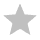
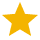
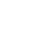

In [22]:
divs= soup.find_all("div")

for div in divs:
    res = div
    if res != None:
        print(res)